In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

sns.set_theme(color_codes=True)

In [2]:
imacec = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/BC%20Imacec.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
imacec.columns = ['imacec']
imacec.tail()

,imacec
Fecha,
2020-12-01,-0.071983
2021-01-01,-2.931077
2021-02-01,-2.080374
2021-03-01,5.770488
2021-04-01,14.052287


In [3]:
ipeco = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/CEEN%20UDD%20IPECO.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
ipeco.columns = ['ipeco', 'coyuntura', 'expectativas', 'ipeco-sea', 'ipeco-da', 'ipeco-sef', 'ipeco-df', 'ipeco-if', 'ipeco-m3']
ipeco = ipeco[['ipeco', 'ipeco-sea', 'ipeco-da', 'ipeco-sef', 'ipeco-df', 'ipeco-if']]
ipeco.tail()

,ipeco,ipeco-sea,ipeco-da,ipeco-sef,ipeco-df,ipeco-if
Fecha,,,,,,
2021-01-01,70.941959,56.303419,103.987953,78.534279,76.075351,60.349190
2021-02-01,86.890132,70.970696,137.805173,87.763363,105.542153,69.841868
2021-03-01,80.562027,51.903942,133.211667,82.546979,105.494734,65.929263
2021-04-01,52.248795,35.568193,69.676773,54.504512,63.636364,48.792962
2021-05-01,76.292156,74.233717,104.180711,78.858801,84.644522,62.220483


In [4]:
ipec = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/GFK%20ADIMARK%20IPEC.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
ipec.columns = ['ipec-sepa', 'ipec-sena', 'ipec-senf12m', 'ipec-senf5y', 'ipec-ec', 'ipec']
ipec.tail()

,ipec-sepa,ipec-sena,ipec-senf12m,ipec-senf5y,ipec-ec,ipec
Fecha,,,,,,
2021-01-01,27.732677,27.048832,37.063938,23.188694,32.412163,29.489262
2021-02-01,29.124720,30.429945,43.852360,23.494522,32.967945,31.973898
2021-03-01,25.384239,28.663019,39.274822,23.418276,29.205111,29.189093
2021-04-01,22.900463,22.300762,34.152779,23.106691,22.041729,24.900484
2021-05-01,28.940214,27.102739,39.096775,23.967649,30.048767,29.831228


In [5]:
ice = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/CEEN%20UDD%20ICE.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
ice.columns = ['ice', 'ice-m3', 'ice-agricola', 'ice-comercio', 'ice-construccion','ice-financiero', 'ice-industria', 'ice-mineria']
ice = ice[['ice', 'ice-agricola', 'ice-comercio', 'ice-construccion','ice-financiero', 'ice-industria', 'ice-mineria']]
ice.tail()

,ice,ice-agricola,ice-comercio,ice-construccion,ice-financiero,ice-industria,ice-mineria
Fecha,,,,,,,
2021-01-01,1.652625,6.844920,7.983970,-21.180036,-3.125000,13.612599,-1.288889
2021-02-01,9.014656,-11.764706,10.674966,-5.529412,25.000000,21.418651,1.833333
2021-03-01,6.794963,12.727273,3.030249,11.961230,-21.875000,8.273810,17.215278
2021-04-01,-3.509817,-17.647059,5.150985,12.183601,-45.833333,15.651290,-15.611111
2021-05-01,0.930573,18.823529,4.975791,-6.157754,-12.500000,6.891369,-2.694444


In [6]:
imce = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/ICARE%20UAI%20IMCE.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
imce.columns = ['imce-comercio', 'imce-construccion', 'imce-industria', 'imce-mineria', 'imce', 'imce-sm']
imce = imce[['imce-comercio', 'imce-construccion', 'imce-industria', 'imce-mineria', 'imce']]
imce.tail()

,imce-comercio,imce-construccion,imce-industria,imce-mineria,imce
Fecha,,,,,
2021-01-01,56.956522,40.079365,54.395604,64.879038,54.379643
2021-02-01,58.404558,44.230769,56.105611,62.604000,55.721718
2021-03-01,61.016949,48.550725,58.108108,51.730401,55.875158
2021-04-01,56.533333,44.791667,52.212389,49.474696,51.416693
2021-05-01,58.539945,40.000000,56.327160,61.676281,54.883423


In [7]:
data = pd.concat([imacec, ipeco, ipec, ice, imce], axis=1)
data = data[['imacec', 'ipeco', 'ipec', 'ice', 'imce']]
data = data.dropna()
print(data.shape)
data.tail()

(194, 5)


,imacec,ipeco,ipec,ice,imce
Fecha,,,,,
2020-12-01,-0.071983,66.987987,29.845440,5.405124,48.000463
2021-01-01,-2.931077,70.941959,29.489262,1.652625,54.379643
2021-02-01,-2.080374,86.890132,31.973898,9.014656,55.721718
2021-03-01,5.770488,80.562027,29.189093,6.794963,55.875158
2021-04-01,14.052287,52.248795,24.900484,-3.509817,51.416693


In [8]:
data.index

DatetimeIndex(['2004-12-01', '2005-03-01', '2005-05-01', '2005-06-01',
               '2005-07-01', '2005-08-01', '2005-09-01', '2005-10-01',
               '2005-11-01', '2005-12-01',
               ...
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01'],
              dtype='datetime64[ns]', name='Fecha', length=194, freq=None)

<AxesSubplot:>

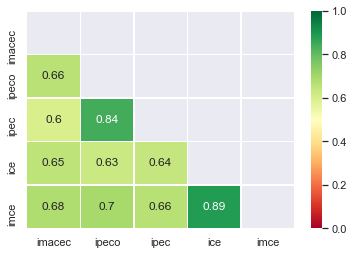

In [9]:
corr_mat = data.corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True

fig, ax =plt.subplots()
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=0, vmax=1)

In [10]:
y = data['imacec']

database = {
    'ipeco': data[['ipeco']],
    'ipec': data[['ipec']],
    'ice':  data[['ice']],
    'imce': data[['imce']],
    'consumidores': data[['ipeco', 'ipec']],
    'empresarios': data[['ice', 'imce']],
    'ipeco_ice': data[['ipeco', 'ice']],
    'ipec_ice': data[['ipec', 'ice']],
    'ipeco_imce': data[['ipeco', 'imce']],
    'ipec_imce': data[['ipec', 'imce']],
    'todos': data[['ipeco', 'ipec', 'ice', 'imce']]
}

In [11]:
lista = database.keys()
model = LinearRegression()
cv = KFold(n_splits=5, random_state=123, shuffle=True)
preds = pd.DataFrame()
results = pd.DataFrame()

In [12]:
for mod in lista:
    X = database[mod]
    model.fit(X, y)
    y_pred = model.predict(X)
    preds[mod] = y_pred
    
    CV_RMSE = np.sqrt(cross_validate(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)['test_score'].mean()*-1)
    n, p = X.shape
    adjR2 = 1 - (1 - r2_score(y, y_pred)) * (n - 1) / (n - p - 1)

    res = pd.DataFrame({
                'CV_RMSE': CV_RMSE,
                'RMSE': np.sqrt(mean_squared_error(y, y_pred)),
                'adjR2': adjR2,
                'MAE': mean_absolute_error(y, y_pred)},
                index=[mod])

    results = results.append(res)

In [13]:
print(results[['CV_RMSE', 'RMSE', 'MAE']].idxmin())
print(results[['adjR2']].idxmax())
results.round(4)

CV_RMSE    ipeco_ice
RMSE           todos
MAE            todos
dtype: object
adjR2    todos
dtype: object


,CV_RMSE,RMSE,adjR2,MAE
ipeco,3.1106,2.9599,0.4340,1.9476
ipec,3.2905,3.1544,0.3572,2.2715
ice,3.1018,2.9816,0.4257,2.0566
imce,3.0042,2.8848,0.4624,1.9984
consumidores,3.1349,2.9436,0.4373,1.9469
empresarios,3.0246,2.8553,0.4706,1.9855
ipeco_ice,2.8693,2.6971,0.5276,1.7926
ipec_ice,2.9837,2.8306,0.4797,1.9367
ipeco_imce,2.8709,2.6992,0.5269,1.8267
ipec_imce,2.9549,2.7778,0.4989,1.9344


<AxesSubplot:xlabel='Fecha'>

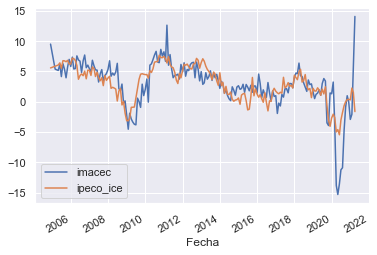

In [14]:
preds.index = data.index
preds['imacec'] = data['imacec']
preds[['imacec', 'ipeco_ice']].plot()

In [15]:
data = pd.concat([imacec, ipeco, ipec, ice, imce], axis=1)
data = data[['imacec', 'ipeco', 'ipec', 'ice', 'imce']]
data[['ipeco', 'ipec', 'ice', 'imce']] = data[['ipeco', 'ipec', 'ice', 'imce']].rolling(6).mean()
data = data.dropna()
print(data.shape)
data.tail()

(187, 5)


,imacec,ipeco,ipec,ice,imce
Fecha,,,,,
2020-12-01,-0.071983,71.745771,27.092292,-9.885213,47.329124
2021-01-01,-2.931077,73.238076,28.470716,-5.475338,50.091201
2021-02-01,-2.080374,75.224536,29.552789,-0.263411,52.292919
2021-03-01,5.770488,76.783566,29.994096,2.221103,53.303742
2021-04-01,14.052287,72.773150,29.157464,2.572912,53.259044


In [16]:
data.index

DatetimeIndex(['2005-10-01', '2005-11-01', '2005-12-01', '2006-01-01',
               '2006-02-01', '2006-03-01', '2006-04-01', '2006-05-01',
               '2006-06-01', '2006-07-01',
               ...
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01'],
              dtype='datetime64[ns]', name='Fecha', length=187, freq='MS')

In [17]:
y = data['imacec']

database = {
    'ipeco': data[['ipeco']],
    'ipec': data[['ipec']],
    'ice':  data[['ice']],
    'imce': data[['imce']],
    'consumidores': data[['ipeco', 'ipec']],
    'empresarios': data[['ice', 'imce']],
    'ipeco_ice': data[['ipeco', 'ice']],
    'ipec_ice': data[['ipec', 'ice']],
    'ipeco_imce': data[['ipeco', 'imce']],
    'ipec_imce': data[['ipec', 'imce']],
    'todos': data[['ipeco', 'ipec', 'ice', 'imce']]
}

In [18]:
lista = database.keys()
model = LinearRegression()
cv = KFold(n_splits=5, random_state=123, shuffle=True)
preds = pd.DataFrame()
results = pd.DataFrame()

In [19]:
for mod in lista:
    X = database[mod]
    model.fit(X, y)
    y_pred = model.predict(X)
    preds[mod] = y_pred
    
    CV_RMSE = np.sqrt(cross_validate(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)['test_score'].mean()*-1)
    n, p = X.shape
    adjR2 = 1 - (1 - r2_score(y, y_pred)) * (n - 1) / (n - p - 1)

    res = pd.DataFrame({
                'CV_RMSE': CV_RMSE,
                'RMSE': np.sqrt(mean_squared_error(y, y_pred)),
                'adjR2': adjR2,
                'MAE': mean_absolute_error(y, y_pred)},
                index=[mod])

    results = results.append(res)

In [20]:
print(results[['CV_RMSE', 'RMSE', 'MAE']].idxmin())
print(results[['adjR2']].idxmax())
results.round(4)

CV_RMSE    todos
RMSE       todos
MAE        todos
dtype: object
adjR2    todos
dtype: object


,CV_RMSE,RMSE,adjR2,MAE
ipeco,2.8977,2.7906,0.5006,1.8674
ipec,3.1986,3.1069,0.3810,2.2195
ice,2.8211,2.7822,0.5037,1.9681
imce,2.7396,2.7082,0.5297,1.8870
consumidores,2.9062,2.7893,0.4984,1.8729
empresarios,2.7279,2.6892,0.5338,1.8697
ipeco_ice,2.6181,2.5021,0.5964,1.6899
ipec_ice,2.7820,2.6924,0.5326,1.8900
ipeco_imce,2.6650,2.5363,0.5853,1.7658
ipec_imce,2.7515,2.6576,0.5447,1.8728


<AxesSubplot:xlabel='Fecha'>

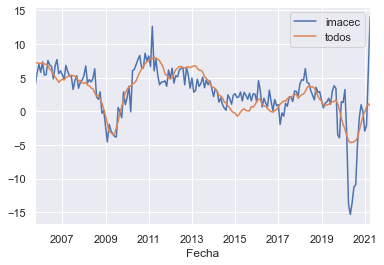

In [21]:
preds.index = data.index
preds['imacec'] = data['imacec']
preds[['imacec', 'todos']].plot()

In [22]:
data = pd.concat([imacec, ipeco, ipec, ice, imce], axis=1)
data = data.drop(['ipeco', 'ipec', 'ice', 'imce'], axis=1)
data = data.dropna()
print(data.shape)
data.tail()

(190, 21)


,imacec,ipeco-sea,ipeco-da,ipeco-sef,ipeco-df,ipeco-if,ipec-sepa,ipec-sena,ipec-senf12m,ipec-senf5y,...,ice-agricola,ice-comercio,ice-construccion,ice-financiero,ice-industria,ice-mineria,imce-comercio,imce-construccion,imce-industria,imce-mineria
Fecha,,,,,,,,,,,,,,,,,,,,,
2020-12-01,-0.071983,58.740526,80.119287,66.010929,82.430523,60.268885,26.916153,26.184008,37.701656,22.053846,...,18.823529,8.309881,2.296791,-43.750000,21.409722,8.204861,56.231884,41.666667,49.833333,39.553456
2021-01-01,-2.931077,56.303419,103.987953,78.534279,76.075351,60.349190,27.732677,27.048832,37.063938,23.188694,...,6.844920,7.983970,-21.180036,-3.125000,13.612599,-1.288889,56.956522,40.079365,54.395604,64.879038
2021-02-01,-2.080374,70.970696,137.805173,87.763363,105.542153,69.841868,29.124720,30.429945,43.852360,23.494522,...,-11.764706,10.674966,-5.529412,25.000000,21.418651,1.833333,58.404558,44.230769,56.105611,62.604000
2021-03-01,5.770488,51.903942,133.211667,82.546979,105.494734,65.929263,25.384239,28.663019,39.274822,23.418276,...,12.727273,3.030249,11.961230,-21.875000,8.273810,17.215278,61.016949,48.550725,58.108108,51.730401
2021-04-01,14.052287,35.568193,69.676773,54.504512,63.636364,48.792962,22.900463,22.300762,34.152779,23.106691,...,-17.647059,5.150985,12.183601,-45.833333,15.651290,-15.611111,56.533333,44.791667,52.212389,49.474696


In [23]:
data.index

DatetimeIndex(['2005-07-01', '2005-08-01', '2005-09-01', '2005-10-01',
               '2005-11-01', '2005-12-01', '2006-01-01', '2006-02-01',
               '2006-03-01', '2006-04-01',
               ...
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01'],
              dtype='datetime64[ns]', name='Fecha', length=190, freq='MS')

In [24]:
data.columns

Index(['imacec', 'ipeco-sea', 'ipeco-da', 'ipeco-sef', 'ipeco-df', 'ipeco-if',
       'ipec-sepa', 'ipec-sena', 'ipec-senf12m', 'ipec-senf5y', 'ipec-ec',
       'ice-agricola', 'ice-comercio', 'ice-construccion', 'ice-financiero',
       'ice-industria', 'ice-mineria', 'imce-comercio', 'imce-construccion',
       'imce-industria', 'imce-mineria'],
      dtype='object')

In [25]:
y = data['imacec']

database = {
    'ipeco': data[['ipeco-sea', 'ipeco-da', 'ipeco-sef', 'ipeco-df', 'ipeco-if']],
    'ipec': data[['ipec-sepa', 'ipec-sena', 'ipec-senf12m', 'ipec-senf5y', 'ipec-ec']],
    'ice':  data[['ice-agricola', 'ice-comercio', 'ice-construccion', 'ice-financiero', 'ice-industria', 'ice-mineria']],
    'imce': data[['imce-comercio', 'imce-construccion', 'imce-industria', 'imce-mineria']],
    'consumidores': data[['ipeco-sea', 'ipeco-da', 'ipeco-sef', 'ipeco-df', 'ipeco-if', 'ipec-sepa', 'ipec-sena', 'ipec-senf12m', 'ipec-senf5y', 'ipec-ec']],
    'empresarios': data[['ice-agricola', 'ice-comercio', 'ice-construccion', 'ice-financiero', 'ice-industria', 'ice-mineria', 'imce-comercio', 'imce-construccion', 'imce-industria', 'imce-mineria']],
    'ipeco_ice': data[['ipeco-sea', 'ipeco-da', 'ipeco-sef', 'ipeco-df', 'ipeco-if', 'ice-agricola', 'ice-comercio', 'ice-construccion', 'ice-financiero', 'ice-industria', 'ice-mineria']],
    'ipec_ice': data[['ipec-sepa', 'ipec-sena', 'ipec-senf12m', 'ipec-senf5y', 'ipec-ec', 'ice-agricola', 'ice-comercio', 'ice-construccion', 'ice-financiero', 'ice-industria', 'ice-mineria']],
    'ipeco_imce': data[['ipeco-sea', 'ipeco-da', 'ipeco-sef', 'ipeco-df', 'ipeco-if', 'imce-comercio', 'imce-construccion', 'imce-industria', 'imce-mineria']],
    'ipec_imce': data[['ipec-sepa', 'ipec-sena', 'ipec-senf12m', 'ipec-senf5y', 'ipec-ec', 'imce-comercio', 'imce-construccion', 'imce-industria', 'imce-mineria']],
    'todos': data.drop(['imacec'], axis=1)
}

In [26]:
lista = database.keys()
model = LinearRegression()
cv = KFold(n_splits=5, random_state=123, shuffle=True)
preds = pd.DataFrame()
results = pd.DataFrame()

In [27]:
for mod in lista:
    X = database[mod]
    model.fit(X, y)
    y_pred = model.predict(X)
    preds[mod] = y_pred
    
    CV_RMSE = np.sqrt(cross_validate(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)['test_score'].mean()*-1)
    n, p = X.shape
    adjR2 = 1 - (1 - r2_score(y, y_pred)) * (n - 1) / (n - p - 1)

    res = pd.DataFrame({
                'CV_RMSE': CV_RMSE,
                'RMSE': np.sqrt(mean_squared_error(y, y_pred)),
                'adjR2': adjR2,
                'MAE': mean_absolute_error(y, y_pred)},
                index=[mod])

    results = results.append(res)

In [28]:
print(results[['CV_RMSE', 'RMSE', 'MAE']].idxmin())
print(results[['adjR2']].idxmax())
results.round(4)

CV_RMSE    ipeco_imce
RMSE            todos
MAE             todos
dtype: object
adjR2    todos
dtype: object


,CV_RMSE,RMSE,adjR2,MAE
ipeco,3.0430,2.8789,0.4521,1.9296
ipec,3.0291,2.9116,0.4396,1.9519
ice,2.9149,2.7314,0.5041,1.8709
imce,2.7841,2.6322,0.5445,1.8994
consumidores,2.9896,2.7799,0.4749,1.8528
empresarios,2.8132,2.5067,0.5730,1.7465
ipeco_ice,2.5807,2.3226,0.6314,1.5741
ipec_ice,2.7241,2.4827,0.5788,1.6893
ipeco_imce,2.5403,2.2819,0.6481,1.6239
ipec_imce,2.6351,2.3995,0.6109,1.6890


<AxesSubplot:xlabel='Fecha'>

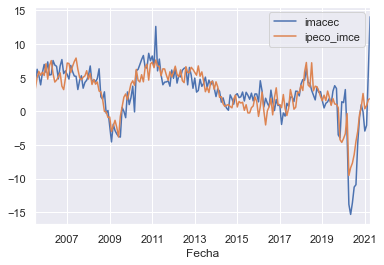

In [29]:
preds.index = data.index
preds['imacec'] = data['imacec']
preds[['imacec', 'ipeco_imce']].plot()

In [30]:
data = pd.concat([ipeco, ipec, ice, imce], axis=1)
data = data.drop(['ipeco', 'ipec', 'ice', 'imce'], axis=1)
data = data.rolling(6).mean()
data = pd.concat([imacec, data], axis=1)
data = data.dropna()
print(data.shape)
data.tail()

(185, 21)


,imacec,ipeco-sea,ipeco-da,ipeco-sef,ipeco-df,ipeco-if,ipec-sepa,ipec-sena,ipec-senf12m,ipec-senf5y,...,ice-agricola,ice-comercio,ice-construccion,ice-financiero,ice-industria,ice-mineria,imce-comercio,imce-construccion,imce-industria,imce-mineria
Fecha,,,,,,,,,,,,,,,,,,,,,
2020-12-01,-0.071983,46.994656,70.928492,81.439659,89.070725,68.189711,23.952845,22.156425,38.083673,23.507482,...,-10.659537,-2.150476,-10.647950,-33.333333,-6.142444,-8.483218,49.954932,32.831356,49.207407,54.259855
2021-01-01,-2.931077,52.408738,79.564967,80.808709,89.268530,67.921798,25.740054,24.151345,38.566966,23.458459,...,-3.868093,2.820053,-9.721182,-27.604167,-0.939402,-4.535417,52.678311,37.398574,51.275478,56.687096
2021-02-01,-2.080374,57.221693,90.795147,79.729080,92.080423,67.786905,26.661099,25.874750,39.499810,24.005742,...,1.033868,7.533606,-7.845960,-17.187500,6.941303,-1.958449,54.898743,40.482929,53.188142,58.575005
2021-03-01,5.770488,58.816423,101.479650,79.848673,94.483511,67.419556,26.978129,26.921122,39.603293,24.216172,...,8.057041,7.676431,-5.391637,-15.104167,9.332755,1.577430,56.903983,43.041930,54.279076,56.585238
2021-04-01,14.052287,55.821024,101.571029,75.612833,87.951039,63.275825,26.441048,26.688291,38.908035,23.520974,...,1.604278,7.416387,-1.565582,-18.055556,12.869378,0.558912,57.364853,44.225156,54.136952,54.858456


In [31]:
data.index

DatetimeIndex(['2005-12-01', '2006-01-01', '2006-02-01', '2006-03-01',
               '2006-04-01', '2006-05-01', '2006-06-01', '2006-07-01',
               '2006-08-01', '2006-09-01',
               ...
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01'],
              dtype='datetime64[ns]', name='Fecha', length=185, freq='MS')

In [32]:
y = data['imacec']

database = {
    'ipeco': data[['ipeco-sea', 'ipeco-da', 'ipeco-sef', 'ipeco-df', 'ipeco-if']],
    'ipec': data[['ipec-sepa', 'ipec-sena', 'ipec-senf12m', 'ipec-senf5y', 'ipec-ec']],
    'ice':  data[['ice-agricola', 'ice-comercio', 'ice-construccion', 'ice-financiero', 'ice-industria', 'ice-mineria']],
    'imce': data[['imce-comercio', 'imce-construccion', 'imce-industria', 'imce-mineria']],
    'consumidores': data[['ipeco-sea', 'ipeco-da', 'ipeco-sef', 'ipeco-df', 'ipeco-if', 'ipec-sepa', 'ipec-sena', 'ipec-senf12m', 'ipec-senf5y', 'ipec-ec']],
    'empresarios': data[['ice-agricola', 'ice-comercio', 'ice-construccion', 'ice-financiero', 'ice-industria', 'ice-mineria', 'imce-comercio', 'imce-construccion', 'imce-industria', 'imce-mineria']],
    'ipeco_ice': data[['ipeco-sea', 'ipeco-da', 'ipeco-sef', 'ipeco-df', 'ipeco-if', 'ice-agricola', 'ice-comercio', 'ice-construccion', 'ice-financiero', 'ice-industria', 'ice-mineria']],
    'ipec_ice': data[['ipec-sepa', 'ipec-sena', 'ipec-senf12m', 'ipec-senf5y', 'ipec-ec', 'ice-agricola', 'ice-comercio', 'ice-construccion', 'ice-financiero', 'ice-industria', 'ice-mineria']],
    'ipeco_imce': data[['ipeco-sea', 'ipeco-da', 'ipeco-sef', 'ipeco-df', 'ipeco-if', 'imce-comercio', 'imce-construccion', 'imce-industria', 'imce-mineria']],
    'ipec_imce': data[['ipec-sepa', 'ipec-sena', 'ipec-senf12m', 'ipec-senf5y', 'ipec-ec', 'imce-comercio', 'imce-construccion', 'imce-industria', 'imce-mineria']],
    'todos': data.drop(['imacec'], axis=1)
}

In [33]:
lista = database.keys()
model = LinearRegression()
cv = KFold(n_splits=5, random_state=123, shuffle=True)
preds = pd.DataFrame()
results = pd.DataFrame()

In [34]:
for mod in lista:
    X = database[mod]
    model.fit(X, y)
    y_pred = model.predict(X)
    preds[mod] = y_pred
    
    CV_RMSE = np.sqrt(cross_validate(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)['test_score'].mean()*-1)
    n, p = X.shape
    adjR2 = 1 - (1 - r2_score(y, y_pred)) * (n - 1) / (n - p - 1)

    res = pd.DataFrame({
                'CV_RMSE': CV_RMSE,
                'RMSE': np.sqrt(mean_squared_error(y, y_pred)),
                'adjR2': adjR2,
                'MAE': mean_absolute_error(y, y_pred)},
                index=[mod])

    results = results.append(res)

In [35]:
print(results[['CV_RMSE', 'RMSE', 'MAE']].idxmin())
print(results[['adjR2']].idxmax())
results.round(4)

CV_RMSE    empresarios
RMSE             todos
MAE              todos
dtype: object
adjR2    todos
dtype: object


,CV_RMSE,RMSE,adjR2,MAE
ipeco,2.8545,2.7129,0.5210,1.8509
ipec,2.7439,2.6201,0.5532,1.7874
ice,2.3770,2.2308,0.6743,1.5630
imce,2.5236,2.3845,0.6320,1.7937
consumidores,2.5237,2.3775,0.6215,1.5849
empresarios,2.3611,2.1476,0.6912,1.5261
ipeco_ice,2.4150,2.1694,0.6831,1.5200
ipec_ice,2.3619,2.1411,0.6913,1.4967
ipeco_imce,2.4344,2.2257,0.6702,1.5775
ipec_imce,2.4167,2.2400,0.6660,1.6223


<AxesSubplot:xlabel='Fecha'>

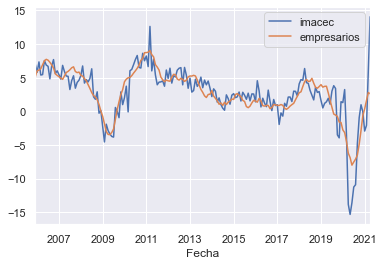

In [36]:
preds.index = data.index
preds['imacec'] = data['imacec']
preds[['imacec', 'empresarios']].plot()